Analysis was performed on dates to find that the month with the most reviews was identified. Additionally, an average rating analysis was conducted and it was found that the highest-rated book was determined.
_____________________________________________
Durante el análisis de la base de datos de Amazon Books Reviews se llevaron a cabo diversas exploraciones. Se realizó un análisis de fechas y se encontró que el mes con más reviews fue mayo. Asimismo, se calculó el promedio de reviews y se descubrió que el libro mejor evaluado fue "Hard-Boiled Wonderland and the End of the World". También se llevaron a cabo análisis de las palabras más utilizadas en los títulos de los libros y se crearon nubes de palabras. En general, estos análisis permitieron obtener una mejor comprensión de la base de datos y de los patrones de consumo y preferencias de los usuarios de Amazon.

El tipo de análisis realizado en la base de datos de Amazon Books Reviews es un análisis exploratorio de datos (EDA, por sus siglas en inglés), que consiste en examinar y visualizar los datos para descubrir patrones, tendencias y relaciones entre las variables. Además, se utilizaron técnicas como el análisis de frecuencia, gráficos de barras y diagramas de dispersión para resumir y visualizar los datos de manera efectiva.

In [1]:
library(tidyverse)
library(caret)
library(tm)
library(SnowballC)
library(e1071)
library(tidytext)
library(dplyr)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content




In [2]:
library(wordcloud)
library("ggplot2")
install.packages("RColorBrewer", repos = "http://cran.us.r-project.org")

Loading required package: RColorBrewer

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.us.r-project.org/src/contrib:
  cannot open URL 'http://cran.us.r-project.org/src/contrib/PACKAGES'”
Warning message:
“package ‘RColorBrewer’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [4]:
# listing files in this directory
dir("../input/")

[1] "amazon-book-reviews-haruki-murakami"

In [5]:
# user can specify specific sheet name to get data from that sheet.
data <- readxl::read_excel("/kaggle/input/amazon-book-reviews-haruki-murakami/murakami data_cleaned.xlsx", sheet = "Review Data")

# Name of columns present in the dataset
colnames(data)

[1] "review_id"     "reviewer_name" "review_date"   "review_rating"
[5] "review_text"   "book_name"

In [6]:
# Quick View of the data
head(data)

review_id reviewer_name       review_date review_rating
1 1         Gabby M             2022-12-30  4            
2 2         Ti                  2013-05-20  5            
3 3         Erik Smith          2023-01-27  5            
4 4         Mahima              2013-10-20  5            
5 5         ghost of a red rose 2010-04-28  4            
6 6         Amazon Customer     2023-01-16  5            
  review_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [7]:
#Data Cleaning: eliminar las puntuaciones y convertir todo el texto en minúsculas, puedes usar las funciones gsub() y tolower() 
data$review_text <- gsub("[[:punct:]]", " ", data$review_text) # Eliminar puntuaciones /delete scores
data$review_text <- tolower(data$review_text) # Convertir todo a minúsculas /Convert all to lowercase

In [9]:
library(tidytext)
# eliminar las palabras vacías /remove stop words
datos_limp <- data %>% 
  unnest_tokens(word, review_text) %>% # Dividir el texto en palabras /Split the text into words
  anti_join(stop_words, by = "word") # Eliminar las palabras vacías /remove stop words

In [10]:
# Quick View of the data
head(datos_limp)

review_id,reviewer_name,review_date,review_rating,book_name,word
<dbl>,<chr>,<dttm>,<dbl>,<chr>,<chr>
1,Gabby M,2022-12-30,4,The Wind-Up Bird Chronicle,remember
1,Gabby M,2022-12-30,4,The Wind-Up Bird Chronicle,reading
1,Gabby M,2022-12-30,4,The Wind-Up Bird Chronicle,haruki
1,Gabby M,2022-12-30,4,The Wind-Up Bird Chronicle,murakami
1,Gabby M,2022-12-30,4,The Wind-Up Bird Chronicle,books
1,Gabby M,2022-12-30,4,The Wind-Up Bird Chronicle,stolen


In [11]:
#Calcular la frecuencia de cada palabra:
word_freq <- datos_limp %>%
  count(word, sort = TRUE)

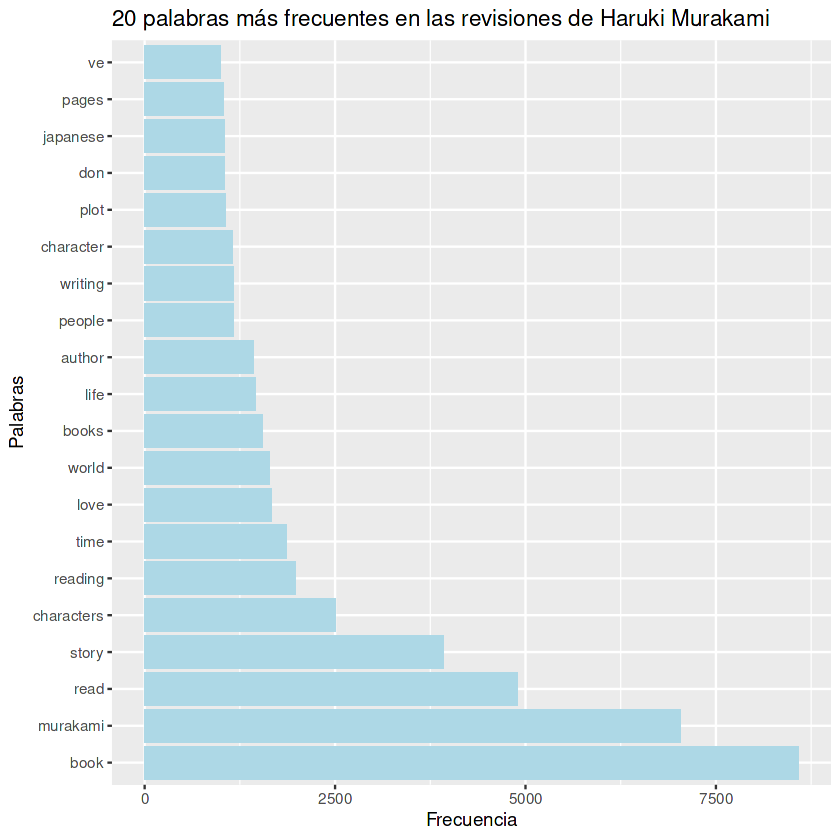

In [12]:
#gráfico de barras para las palabras más frecuentes:
library(ggplot2)

ggplot(word_freq[1:20, ], aes(x = reorder(word, -n), y = n)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  coord_flip() +
  labs(title = "20 palabras más frecuentes en las revisiones de Haruki Murakami",
       x = "Palabras",
       y = "Frecuencia")

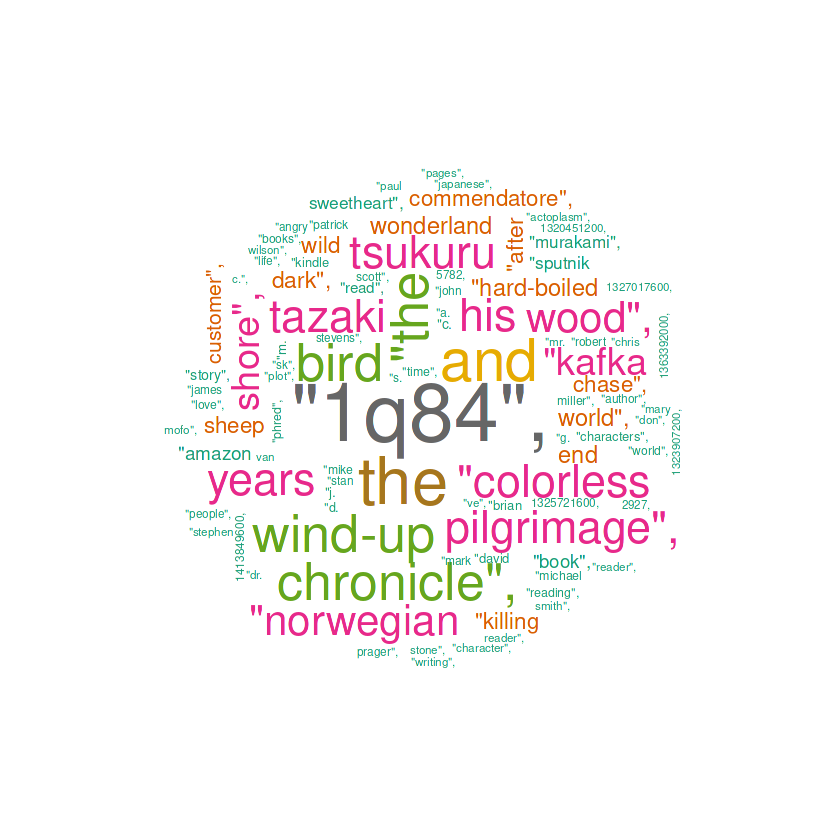

In [13]:
wordcloud(words = datos_limp, max.words = 100, random.order = FALSE, colors = brewer.pal(8, "Dark2"))

In [14]:
# Convertir la columna "review_rating" a tipo numérico
data$review_rating <- as.numeric(data$review_rating)

# Calcular el promedio de ratings por nombre de libro
avg_ratings <- aggregate(review_rating ~ book_name, data = data, FUN = mean)

# Mostrar el resultado
avg_ratings



book_name,review_rating
<chr>,<dbl>
1Q84,3.819413
A Wild Sheep Chase,4.222571
After Dark,3.976834
Colorless Tsukuru Tazaki and His Years of Pilgrimage,4.126346
Hard-Boiled Wonderland and the End of the World,4.395393
Kafka on the Shore,4.206327
Killing Commendatore,4.129477
Norwegian Wood,4.207123
Sputnik Sweetheart,4.143713


Date analysis- Analisis de fecha

In [17]:
# Cargar el paquete de lubridate
library(lubridate)

# Convertir la columna "review_date" a tipo fecha
data$review_date <- ymd(data$review_date)

In [19]:
# Create new columns for the year, month, and day of the revision date/ Crear nuevas columnas para el año, mes y día de la fecha de revisión
data$review_year <- year(data$review_date)
data$review_month <- month(data$review_date)
data$review_day <- day(data$review_date)


In [20]:
# Calculate the number of revisions per year/ Calcular el número de revisiones por año 
reviews_per_year <- aggregate(review_id ~ review_year, data = data, FUN = length)

# show result/ Mostrar el resultado
reviews_per_year

review_year,review_id
<dbl>,<int>
1997,1
1998,12
1999,8
2000,46
2001,66
2002,62
2003,37
2004,39
2005,51


In [21]:
#Calculate the number of reviews per month:
data$review_month <- format(data$review_date, "%B")
review_counts <- table(data$review_month)
review_counts


    April    August  December  February   January      July      June     March 
      531       713       728       610       736       570       537       609 
      May  November   October September 
      527       653       747       748 

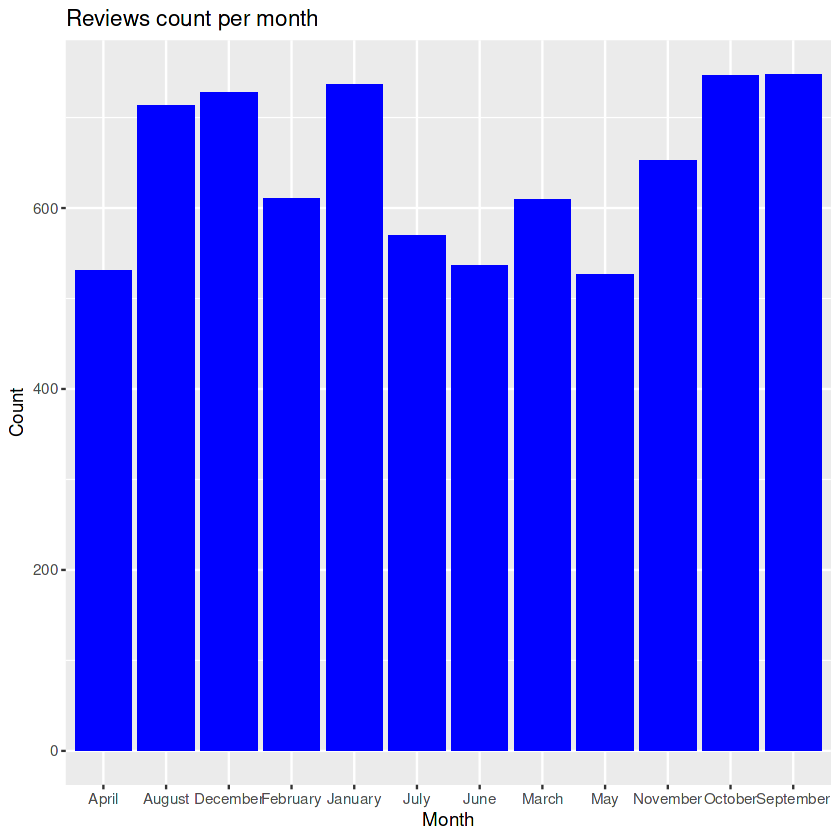

In [22]:
#View the number of reviews per month in a bar chart:
review_counts <- table(data$review_month)
df <- data.frame(month=names(review_counts), count=as.numeric(review_counts))
ggplot(df, aes(x=month, y=count)) + 
  geom_bar(stat="identity", fill="blue") +
  labs(title="Reviews count per month", x="Month", y="Count")




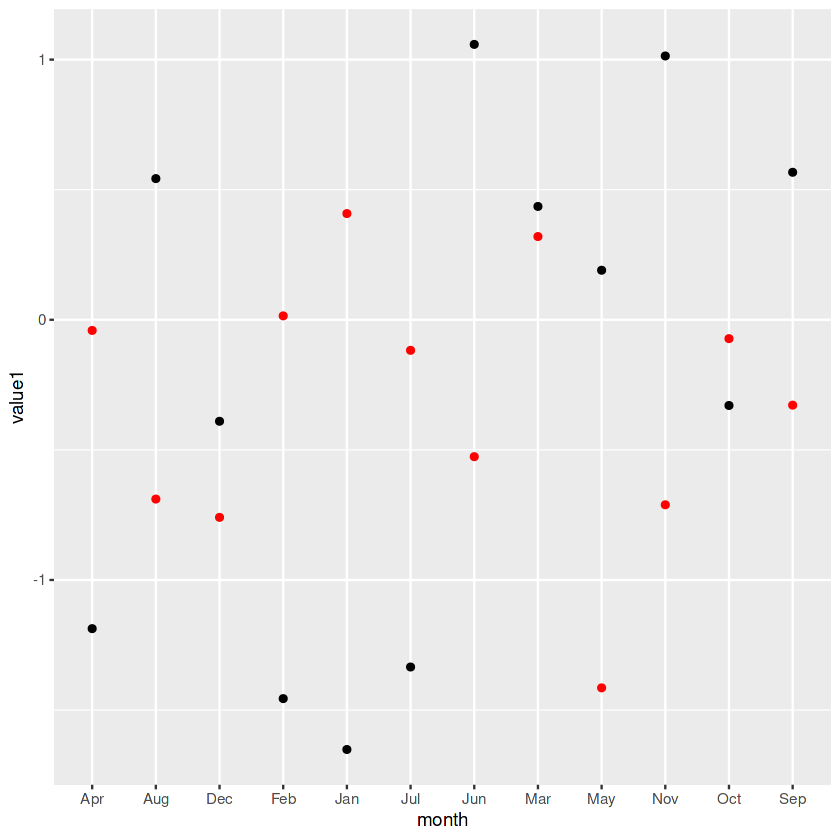

In [23]:
#Scatterplot with months on the X-axis:

# Crear un data frame de ejemplo con meses
months <- month.abb[1:12]
data <- data.frame(month = months, value1 = rnorm(length(months)), value2 = rnorm(length(months)))

# Crear el gráfico de dispersión
ggplot(data, aes(x = month, y = value1)) + 
  geom_point() +
  geom_point(aes(y = value2), color = "red")


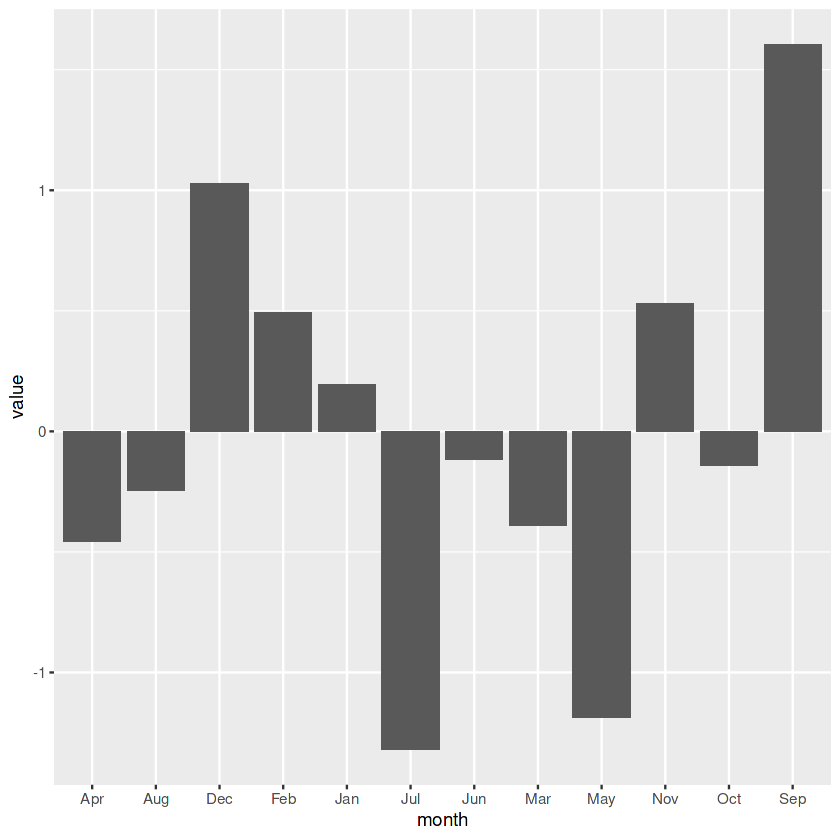

In [24]:
#Bar chart with months on the X axis: 
# Crear un data frame de ejemplo con meses
months <- month.abb[1:12]
data <- data.frame(month = months, value = rnorm(length(months)))

# Crear el gráfico de barras
ggplot(data, aes(x = month, y = value)) +
  geom_bar(stat = "identity")


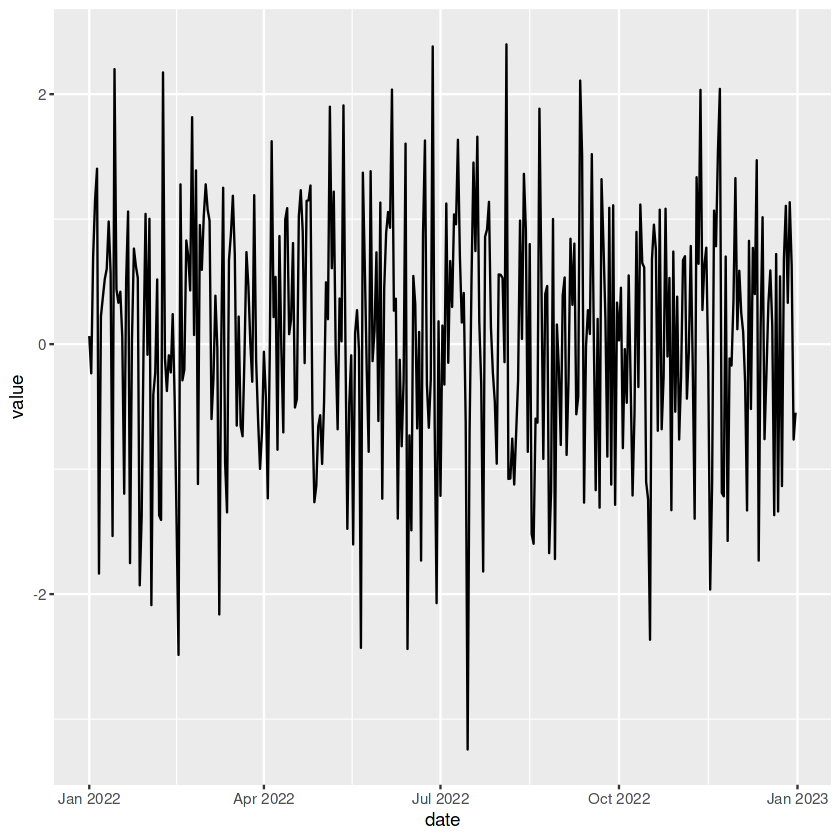

In [25]:
#Line chart with dates on the X axis:
# Crear un data frame de ejemplo con fechas
dates <- seq(as.Date("2022-01-01"), as.Date("2022-12-31"), by = "day")
data <- data.frame(date = dates, value = rnorm(length(dates)))

# Crear el gráfico de líneas
library(ggplot2)
ggplot(data, aes(x = date, y = value)) + 
  geom_line()

